# The Sparks Foundation-Data Science & Business Analytics Internship


## Author: Prakash Nikam


## Task 2 - Prediction using UnSupervised Machine Learning¶


● From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually.



### This simple project comes under Unsupervised Machine Learning & uses K-Means clustering algorithm.

following Steps are required for Predict the optimum number of Clusters and Visualization.

●Step 1- Import the required libraries like numpy,pandas,matplotlib,seaborn and Sklearn.

●Step 2- Read the csv data.

●Step 3- calculate the Within cluster sum of squares(wcss). 

●Step 4- Plot the elbow graph & select the number of clusters. 

●Step 5- Fit the model & predict it using K-Means.

●Step 6- Plot a Scatter graph for the clusters.

### Step 1 - Import the required libraries

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Step 2- Read the csv data 

In [3]:
# Load the iris dataset
iris_df= pd.read_csv("C:/Users/Prakash/Desktop/TSF GRIP MAY21/Iris.csv")
print('Dataset is imported successfully')


Dataset is imported successfully


In [16]:
# To find top five values in dataset

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# To find top bottom values in dataset
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
#To find number of columns and rows
iris_df.shape

(150, 6)

In [19]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
# To find more information about our dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
#types of Species
iris_df['Species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
iris_df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [23]:
# To find null or missing values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### So in our Dataset there is no null or missing values present.



In [51]:
x = iris_df.iloc[:, [1, 2, 3,4]].values      #choosing the required columns from dataset
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Step 3- calculate the Within cluster sum of squares(wcss)

In [49]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []                              # Within cluster sum of squares


for i in range(1, 11):
    kmeans = KMeans(init = 'k-means++',n_clusters=i,max_iter=300,random_state = 0)                       
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


### Step 4- Plot the elbow graph & select the number of clusters

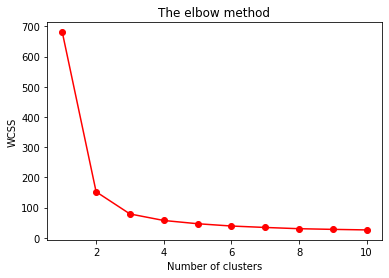

In [52]:
# optimum number of clusters would be obtained at the elbow method
# Plotting the results onto a line graph

plt.plot(range(1, 11), wcss,'ro-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')                  # Within cluster sum of squares
plt.show()

#### From the above graph, the optimum clusters is where the elbow occurs,therefore its called as  'The elbow method'. 
#### At the optimum number of clusters the WCSS does not decrease significantly with each iteration.
#### The optimum number of clusters appears at the elbow point.
####  From this graph we choose the number of clusters as  '3' beacause at the point elbow point equals to optimum number of clusters.



### Step 5- Fit the model & predict it using K-Means

In [53]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3,init="k-means++",random_state=0)
y_kmeans = kmeans.fit_predict(x)




In [54]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### here 0,1 and 2 are label of Species

### Step 6- Plot a Scatter graph for the clusters

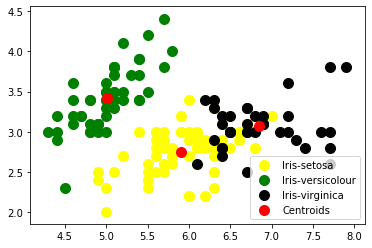

In [59]:
# Visualising the clusters On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')


# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

#describing the elements of the graph
plt.legend()     

### Here Clusters are Represented Visually

## Thank You